# *EBAC: Cientista de Dados - Avaliações dos  Módulos-Aulas*

### Etapa II - Módulos Principais - M(1-39,...), Aulas-Disciplinas, Instruções, Tarefas/Provas
 
### MÓDULO 7:  Estudo da Aplicação do Método "Aprendizagem de Máquina" na Determinação de Fatores de Relação entre Dados Específicos e sua Predição em Eventos Pré-Determinados de Resposta: Pré-configurações e Iniciação 2(Partindo de Tarefa-Avaliação anterior-ebac: Análise dos Movimentos de Crédito de Clientes e suas Possíveis Variáveis Explicativas, restritas ao Formulário de Entrevista/Descrição de Carácter Civil-Físico).

### Avaliação-Tarefa_2

### Arquivos Avaliação: av2_m7.ipynb, dd_credpx.csv, dd_credpx_01.csv;

Aluno: Luiz E.G.Padilha; 24/02/2023, Santa Maria - RS/Brasil.

# Índice <a name="Contents"></a>
1. [Introdução ao Aprendizado de Máquina na Predição de Resposta-Modelo](#Intro)
2. [Importando Bibliotecas: Modulos, Pacotes e Outros](#Biblio_tec)
3. [Carregando Dados: DataFrame Pandas](#C_Dados)
4. [Tratamento de Erros: Ausência de Valores e Outros](#T_dd_Erros)
5. [Pré-Modelização: Análise Descritiva das Variáveis/Valores](#AE_Desc)
6. [Transformação de Variáveis, Dummy(0,1), para Modelização](#T_dd_M_1)
7. [Separando População e Amostra(Treino, Teste) para Modelização](#T_dd_M_2)
8. [Pré-poda das Árvores de Decisão](#Pre-poda)
9. [Conclusões](#Conclusões)
10. [Referências_Bibliográficas](#Biblio_ref)

# 1. Introdução <a name="Intro"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

# Introdução: Árvores de Decisão, Aprendizado-Máquina, CRISP-DM


    Manipulação de parâmetros no uso de árvores de decisão no aprendizado de máquina.

## Etapa 1 CRISP - DM: Entendimento do negócio

Como primeira etapa do CRISP-DM, vamos entender do que se trata o negócio, e quais os objetivos. 

Este é um problema de concessão de cartões de crédito, publicado no [Kaggle](https://www.kaggle.com/), uma plataforma que promove desafios de ciência de dados, oferecendo prêmios em dinheiro para os melhores colocados. O link original está [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).  
  
Essa é uma base de proponentes de cartão de crédito, nosso objetivo é construir um modelo preditivo para identificar o risco de inadimplência (tipicamente definida pela ocorrência de um atraso maior ou igual a 90 em um horizonte de 12 meses) através de variáveis que podem ser observadas na data da avaliação do crédito (tipicamente quando o cliente solicita o cartão).

Atividades do CRISP-DM:

- Objetivos do negócio
Note que o objetivo aqui é que o modelo sirva o mutuário (o cliente) para que avalie suas próprias decisões, e não a instituição de crédito.
- Objetivos da modelagem
O objetivo está bem definido: desenvolver o melhor modelo preditivo de modo a auxiliar o mutuário a tomar suas próprias decisões referentes a crédito.
  
Nessa etapa também se avalia a situação da empresa/segmento/assunto de modo a se entender o tamanho do público, relevância, problemas presentes e todos os detalhes do processo gerador do fenômeno em questão, e portanto dos dados.

Também é nessa etapa que se constrói um planejamento do projeto.

## Etapa 2 Crisp-DM: Entendimento dos dados
A segunda etapa é o entendimento dos dados. Foram fornecidas 15 variáveis mais a variável resposta (em negrito na tabela). O significado de cada uma dessas variáveis se encontra na tabela.

#### Dicionário de dados

Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes. Colocamos uma cópia o dicionário de dados (explicação dessas variáveis) abaixo neste notebook:

| Variable Name            | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| sexo| M = 'Masculino'; F = 'Feminino' |M/F|
| posse_de_veiculo| Y = 'possui'; N = 'não possui' |Y/N|
| posse_de_imovel| Y = 'possui'; N = 'não possui' |Y/N|
| qtd_filhos| Quantidade de filhos |inteiro|
| tipo_renda|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| educacao| Nível de educação (ex: secundário, superior etc) |texto|
| estado_civil | Estado civil (ex: solteiro, casado etc)| texto |
| tipo_residencia | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| idade | idade em anos |inteiro|
| tempo de emprego | tempo de emprego em anos |inteiro|
| possui_celular | Indica se possui celular (1 = sim, 0 = não) |binária|
| possui_fone_comercial | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| possui_fone | Indica se possui telefone (1 = sim, 0 = não) |binária|
| possui_email | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| qt_pessoas_residencia | quantidade de pessoas na residência |inteiro|
| **mau** | indicadora de mau pagador (True = mau, False = bom) |binária|





# 2. Importando Bibliotecas: Modulos, Pacotes e Outros <a name="Biblio_tec"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

### AV1_M7_R1: - Carreguando a base de Dados e avaliando valores/variáveis

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

#### Carregando Bibliotecas para:
### Manipulação de Dados e Geração de Análise Numérica&Gráfica "Machini-learn"

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

# 3. Carregando Dados: DataFrame Pandas<a name="C_Dados"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [13]:
df = pd.read_csv('sys_dd_credpx.csv')

# 4. Tratamento de Erros: Ausência de Valores e Outros<a name="T_dd_Erros"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)


### Verificação de Valores de Dados Faltantes:

In [14]:
print('========================================================')
print('Tabela 02: Valores do Banco de Dados(df) e Ausências:')
print ("BD[Lin,Col]: {}".format(df.shape))
print('________________________________________________________')
print('--------------------------------------------------------')
print(df.isna().any())
print('--------------------------------------------------------')
print('________________________________________________________')
print('Obs.: Não há ausências, dados tratados.')

Tabela 02: Valores do Banco de Dados(df) e Ausências:
BD[Lin,Col]: (16650, 16)
________________________________________________________
--------------------------------------------------------
sexo                     False
posse_de_veiculo         False
posse_de_imovel          False
qtd_filhos               False
tipo_renda               False
educacao                 False
estado_civil             False
tipo_residencia          False
idade                    False
tempo_emprego            False
possui_celular           False
possui_fone_comercial    False
possui_fone              False
possui_email             False
qt_pessoas_residencia    False
mau                      False
dtype: bool
--------------------------------------------------------
________________________________________________________
Obs.: Não há ausências, dados tratados.


In [15]:
print('========================================================')
print('Tabela 01: Variáveis do Banco de Dados(df) e Seus Tipos:')
print ("BD[Lin,Col]: {}".format(df.shape))
print('________________________________________________________')
print('--------------------------------------------------------')
df.info()
print('--------------------------------------------------------')
print('________________________________________________________')

Tabela 01: Variáveis do Banco de Dados(df) e Seus Tipos:
BD[Lin,Col]: (16650, 16)
________________________________________________________
--------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_co

#### Carregando Arquivos de Dados Brutos: sys_dd_credpx.csv

Obs.LEGP: Foi detectado na análise descritiva um conjunto de dados(n=2793) da variável tempo de emprego definidos de forma negativa e pelo mesmo valor(-1000,66575342466), os quais não pertencente ao intervalo de valores válidos para esta variável.

Metodologia de correção: Anular conjunto de dados.

In [16]:
#
 # Analisando Existência Val. Neg. e Excluíndo da Base/Dados por função copy, c/Restrição, Valor X<0
#
var = 'tempo_emprego'
len(df), (df[var][0:]<0).sum(), len(df) - (df[var][0:]<0).sum()
#
# Alternativa-Tentativa 1: - df recriado não aceita função anteriormente aplicada com sucesso;
# Alternativa-Tentativa 2: - apenas reclassificar e limitar valores <0, ordem inversa; ...
# Obs.: Nenhuma Alternativa anterior dará resultado sem restaurar o índice df após mudanças por
# exclusão ou re-classificação;
# Tentativa 3: Anular Índice, Salvar arquivo.csv, recarregar df.(OK)
#

(16650, 2793, 13857)

In [17]:
# Realizando cópia Seletiva de Correção-Crr:
df_01 = df[df['tempo_emprego']>0].copy()

In [18]:
# Verificando Exclusão:
(df_01[var][0:]<0).sum()

0

### AV1_M7_R5: Salvando Base de Dados Corrigida e Recarregando Dados em DataFrame

In [19]:
# Anulado Índice anterior, salvando dados_crr.csv, recarregando DataFrame:
df_01.set_index('idade', inplace = True)
df_01 = df_01.sort_values('idade')
df_01.to_csv('sys_dd_credpx_01.csv')
df_02 = pd.read_csv('sys_dd_credpx_01.csv')
df = df_02

# 5. Pré-Modelização: Análise Descritiva das Variáveis/Valores<a name="AE_Desc"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. Nesta demonstração vamos ver a variável resposta e dois exemplos de univariada apenas. Mas sinta-se à vontade para tentar observar outras variáveis.

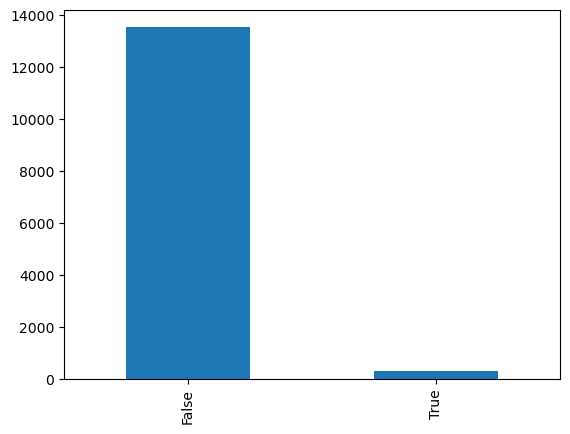

In [20]:
var = 'mau'
grafico_barras = df[var].value_counts().plot.bar()

In [21]:
cont_n = df['mau'].value_counts().copy()
n = len(df['mau'])
tab = [["Atraso_Fatura <  90dias", cont_n[False], round((cont_n[False]/n)*100,2)],
       ["Atraso_Fatura >= 90dias", cont_n[True], round((cont_n[True]/n)*100,2)]
      ]
tab1 = pd.DataFrame(tab, columns = ["Classe_Var_Resposta-VR", "n", "%"])
print(tab1)

    Classe_Var_Resposta-VR      n     %
0  Atraso_Fatura <  90dias  13538  97.7
1  Atraso_Fatura >= 90dias    319   2.3


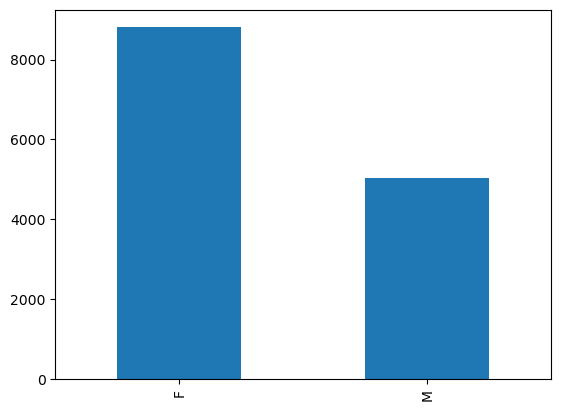

In [12]:
var = 'sexo'
grafico_barras = df[var].value_counts().plot.bar()

In [22]:
cont_n = df['sexo'].value_counts().copy()
n = len(df['sexo'])
cont_1_Mau=0
cont_2_Mau=0
i = 0
for i in range(0,13857):
    if df['sexo'][i]=='F' and df['mau'][i] == True:
        cont_1_Mau = cont_1_Mau + 1
    elif df['sexo'][i]=='M' and df['mau'][i] == True:
        cont_2_Mau = cont_2_Mau + 1
tab = [["G_F", cont_n[0], round((cont_n[0]/n)*100,2), cont_1_Mau, round((cont_1_Mau/cont_n[0])*100,2)],
       ["G_M", cont_n[1], round((cont_n[1]/n)*100,2), cont_2_Mau, round((cont_2_Mau/cont_n[1])*100,2)]
      ]
tab2 = pd.DataFrame(tab, columns = ["Classe", "n", "%", "y_mau", "Y_VR%"])
print(tab2)

  Classe     n      %  y_mau  Y_VR%
0    G_F  8808  63.56    188   2.13
1    G_M  5049  36.44    131   2.59


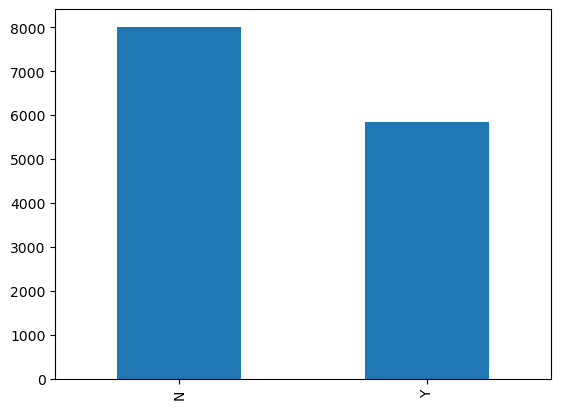

In [14]:
var = 'posse_de_veiculo'
grafico_barras = df[var].value_counts().plot.bar()

In [23]:
cont_n = df[var].value_counts().copy()
n = len(df[var])
cont_1_Mau=0
cont_2_Mau=0
for i in range(0,13857):
    if df['posse_de_veiculo'][i]=='N' and df['mau'][i] == True:
        cont_1_Mau = cont_1_Mau + 1
    elif df['posse_de_veiculo'][i]=='Y' and df['mau'][i] == True:
        cont_2_Mau = cont_2_Mau + 1
tab = [["PV_N", cont_n[0], round((cont_n[0]/n)*100,2),cont_1_Mau,round((cont_1_Mau/cont_n[0])*100,2)],
       ["PV_S", cont_n[1], round((cont_n[1]/n)*100,2),cont_2_Mau,round((cont_2_Mau/cont_n[1])*100,2)]
      ]
tab3 = pd.DataFrame(tab, columns = ["Classe", "n", "%", "y_mau", "Y_VR%"])
print(tab3)

  Classe      n     %  y_mau  Y_VR%
0   PV_N  13538  97.7    189   1.40
1   PV_S    319   2.3    130  40.75


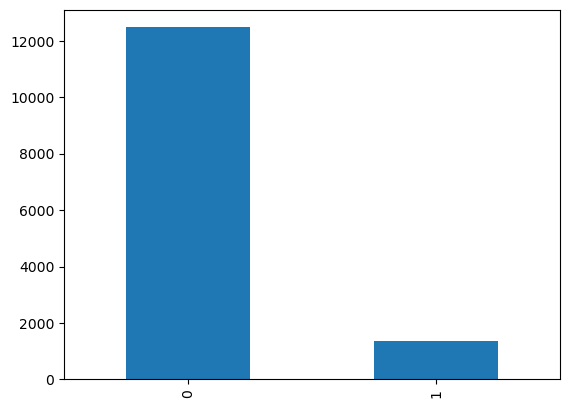

In [16]:
var = 'possui_email'
grafico_barras = df[var].value_counts().plot.bar()

In [24]:
cont_n = df[var].value_counts().copy()
n = len(df[var])
cont_1_Mau=0
cont_2_Mau=0
for i in range(0,13857):
    if df[var][i]==0 and df['mau'][i] == True:
        cont_1_Mau = cont_1_Mau + 1
    elif df[var][i]==1 and df['mau'][i] == True:
        cont_2_Mau = cont_2_Mau + 1
tab = [["P@_N", cont_n[0], round((cont_n[0]/n)*100,2),cont_1_Mau,round((cont_1_Mau/cont_n[0])*100,2)],
       ["P@_S", cont_n[1], round((cont_n[1]/n)*100,2),cont_2_Mau,round((cont_2_Mau/cont_n[1])*100,2)]
      ]
tab33 = pd.DataFrame(tab, columns = ["Classe", "n", "%", "y_mau", "Y_VR%"])
print(tab33)
print(tab3)

  Classe      n     %  y_mau  Y_VR%
0   P@_N  13538  97.7      0    0.0
1   P@_S    319   2.3    319  100.0
  Classe      n     %  y_mau  Y_VR%
0   PV_N  13538  97.7    189   1.40
1   PV_S    319   2.3    130  40.75


#### AV1_M7_Q4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

### AV1_M7_R4: 

- O número de pessoas que possuem email(declarado), conforme análise, possue valor baixo(9.9%) e diferença extrema(90.1-9.9=80.2) em relação aos que não possuem, maioria(90.1%). - O número de pessoas que
possuem veículo(42.19%) é um pouco menor(15.6) do que aqueles que não possuem(57.81%); - Aqueles que possuem
ambas variáveis positivas, possuir algo, objeto-material, endereço-email-objeto-virtual-, obtiveram frequência
menor para variável resposta positiva, mau-pagador, ou em estado de inadimplência financeira com crédito tomado; - Em termos de predição a variável possuir veículo ou não tem população mais equilibrada, e de certa forma duas
grandes sub-populações equivalentes, garantindo assim representatividade da variável analisada e melhor predição ou inferência probabilística.
    

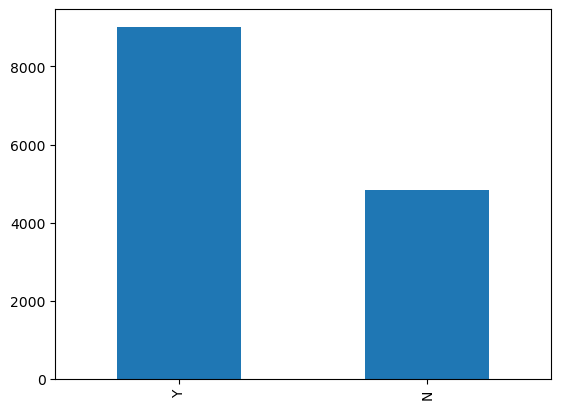

In [25]:
var = 'posse_de_imovel'
grafico_barras = df[var].value_counts().plot.bar()

In [26]:
cont_n = df['posse_de_imovel'].value_counts().copy()
n = len(df['posse_de_imovel'])
cont_1_Mau=0
cont_2_Mau=0
for i in range(0,13857):
    if df['posse_de_imovel'][i]=='Y' and df['mau'][i] == True:
       cont_1_Mau = cont_1_Mau + 1
    elif df['posse_de_imovel'][i]=='N' and df['mau'][i] == True:
        cont_2_Mau = cont_2_Mau + 1
tab = [["PI_S", cont_n[0], round((cont_n[0]/n)*100,2), cont_1_Mau,round((cont_1_Mau/cont_n[0])*100,2)],
       ["PI_N", cont_n[1], round((cont_n[1]/n)*100,2), cont_2_Mau,round((cont_2_Mau/cont_n[1])*100,2)]
      ]
tab4 = pd.DataFrame(tab, columns = ["Classe", "n", "%", "y_mau", "Y_VR%"])
print(tab4)

  Classe     n      %  y_mau  Y_VR%
0   PI_S  9013  65.04    184   2.04
1   PI_N  4844  34.96    135   2.79


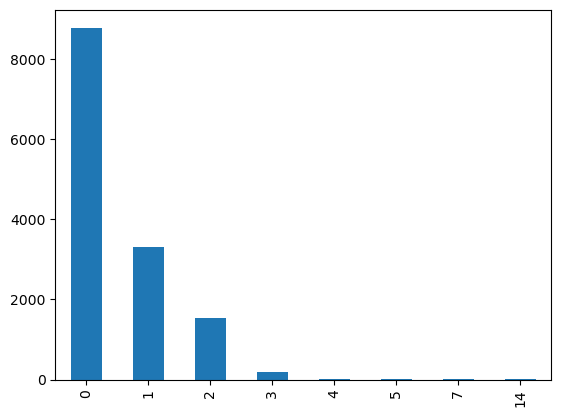

In [27]:
var = 'qtd_filhos'
grafico_barras = df[var].value_counts().plot.bar()

In [28]:
cont_n = df['qtd_filhos'].value_counts().copy()
n = len(df['qtd_filhos'])
cont_1_Mau=0
cont_2_Mau=0
cont_3_Mau=0
cont_4_Mau=0
cont_5_Mau=0
cont_6_Mau=0
for i in range(0,13857):
    if df['qtd_filhos'][i]==0 and df['mau'][i] == True:
        cont_1_Mau = cont_1_Mau + 1
    elif df['qtd_filhos'][i]==1 and df['mau'][i] == True:
        cont_2_Mau = cont_2_Mau + 1
    elif df['qtd_filhos'][i]==2 and df['mau'][i] == True:
        cont_3_Mau = cont_3_Mau + 1
    elif df['qtd_filhos'][i]==3 and df['mau'][i] == True:
        cont_4_Mau = cont_4_Mau + 1
    elif df['qtd_filhos'][i]==4 and df['mau'][i] == True:
        cont_5_Mau = cont_5_Mau + 1
    elif df['qtd_filhos'][i]==5 and df['mau'][i] == True:
        cont_6_Mau = cont_6_Mau + 1
tab = [["QF_0", cont_n[0], round((cont_n[0]/n)*100,2),cont_1_Mau,round((cont_1_Mau/cont_n[0])*100,2)],
       ["QF_1", cont_n[1], round((cont_n[1]/n)*100,2),cont_2_Mau,round((cont_2_Mau/cont_n[1])*100,2)],
       ["QF_2", cont_n[2], round((cont_n[2]/n)*100,2),cont_3_Mau,round((cont_3_Mau/cont_n[2])*100,2)],
       ["QF_3", cont_n[3], round((cont_n[3]/n)*100,2),cont_4_Mau,round((cont_4_Mau/cont_n[3])*100,2)],
       ["QF_4", cont_n[4], round((cont_n[4]/n)*100,2),cont_5_Mau,round((cont_5_Mau/cont_n[4])*100,2)],
       ["QF_5", cont_n[5], round((cont_n[5]/n)*100,2),cont_6_Mau,round((cont_6_Mau/cont_n[5])*100,2)]
      ]
tab5 = pd.DataFrame(tab, columns = ["Classe", "n", "%", "y_mau", "VR%"])
print(tab5)

  Classe     n      %  y_mau   VR%
0   QF_0  8788  63.42    203  2.31
1   QF_1  3319  23.95     68  2.05
2   QF_2  1533  11.06     40  2.61
3   QF_3   187   1.35      7  3.74
4   QF_4    24   0.17      1  4.17
5   QF_5     2   0.01      0  0.00


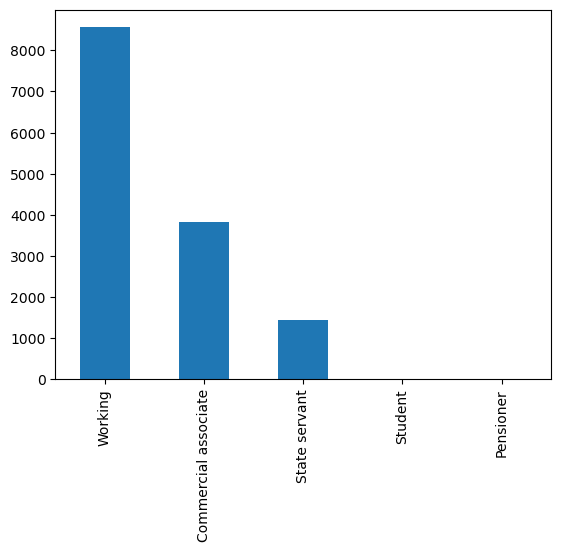

In [29]:
var = 'tipo_renda'
grafico_barras = df[var].value_counts().plot.bar()

In [30]:
cont_n = df['tipo_renda'].value_counts().copy()
n = len(df['tipo_renda'])
cont_1_Mau=0
cont_2_Mau=0
cont_3_Mau=0
cont_4_Mau=0
cont_5_Mau=0
for i in range(0,13857):
    if df['tipo_renda'][i]=='Working' and df['mau'][i] == True:
        cont_1_Mau += 1
    elif df['tipo_renda'][i]=='Commercial associate' and df['mau'][i] == True:
        cont_2_Mau += 1
    elif df['tipo_renda'][i]=='State servant' and df['mau'][i] == True:
        cont_3_Mau += 1
    elif df['tipo_renda'][i]=='Student' and df['mau'][i] == True:
        cont_4_Mau += 1
    elif df['tipo_renda'][i]=='Pensioner' and df['mau'][i] == True:
        cont_5_Mau += 1
#
y_1 = round((cont_1_Mau/cont_n[0])*100,2)
y_2 = round((cont_2_Mau/cont_n[1])*100,2)
y_3 = round((cont_3_Mau/cont_n[2])*100,2)
y_4 = round((cont_4_Mau/cont_n[3])*100,2)
#if cont_4_Mau == 0:
#    y_4 = 0.
#else:    
#    y_4 = round((cont_4_Mau/cont_n[3])*100,2)
y_5 = round((cont_5_Mau/cont_n[4])*100,2)
#       
tab = [["TR_1", cont_n[0], str(round((cont_n[0]/n)*100,2))+'%',cont_1_Mau,y_1],
       ["TR_2", cont_n[1], str(round((cont_n[1]/n)*100,2))+'%',cont_2_Mau,y_2],
       ["TR_3", cont_n[2], str(round((cont_n[2]/n)*100,2))+'%',cont_3_Mau,y_3],
       ["TR_4", cont_n[3], str(round((cont_n[3]/n)*100,2))+'%',cont_4_Mau,y_4],
       ["TR_5", cont_n[4], str(round((cont_n[4]/n)*100,2))+'%',cont_5_Mau,y_5]
      ]
tab6 = pd.DataFrame(tab, columns = ["Classe", "n", "%", "y-mau","Y_VR%"])
print(tab6)

  Classe     n       %  y-mau   Y_VR%
0   TR_1  8565  61.81%    188    2.19
1   TR_2  3826  27.61%     98    2.56
2   TR_3  1451  10.47%     26    1.79
3   TR_4     8   0.06%      0    0.00
4   TR_5     7   0.05%      7  100.00


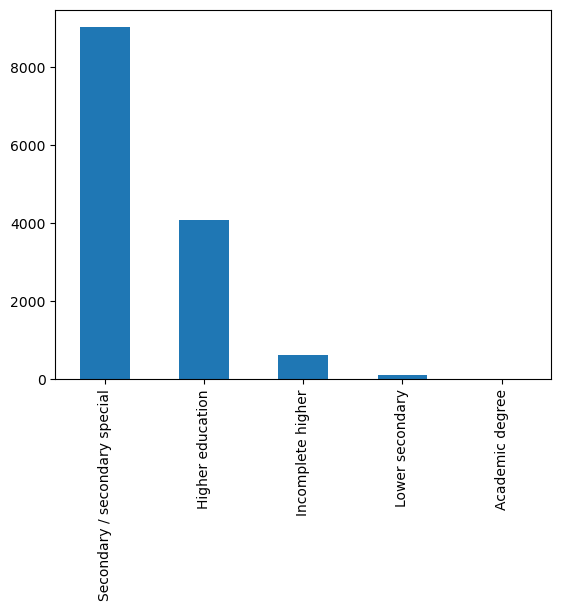

In [31]:
var = 'educacao'
grafico_barras = df[var].value_counts().plot.bar()

In [32]:
cont_n = df['educacao'].value_counts().copy()
n = len(df['educacao'])
cont_1_Mau=0
cont_2_Mau=0
cont_3_Mau=0
cont_4_Mau=0
cont_5_Mau=0
for i in range(0,13857):
    if df['educacao'][i]=='Secondary / secondary special' and df['mau'][i] == True:
        cont_1_Mau += 1
    elif df['educacao'][i]=='Higher education' and df['mau'][i] == True:
        cont_2_Mau += 1
    elif df['educacao'][i]=='Incomplete higher' and df['mau'][i] == True:
        cont_3_Mau += 1
    elif df['educacao'][i]=='Lower secondary' and df['mau'][i] == True:
        cont_4_Mau += 1
    elif df['educacao'][i]=='Academic degree' and df['mau'][i] == True:
        cont_5_Mau += 1
tab = [["ED_1", cont_n[0], round((cont_n[0]/n)*100,2),cont_1_Mau,round((cont_1_Mau/cont_n[0])*100,2)],
       ["ED_2", cont_n[1], round((cont_n[1]/n)*100,2),cont_2_Mau,round((cont_2_Mau/cont_n[1])*100,2)],
       ["ED_3", cont_n[2], round((cont_n[2]/n)*100,2),cont_3_Mau,round((cont_3_Mau/cont_n[2])*100,2)],
       ["ED_4", cont_n[3], round((cont_n[3]/n)*100,2),cont_4_Mau,round((cont_4_Mau/cont_n[3])*100,2)],
       ["ED_5", cont_n[4], round((cont_n[4]/n)*100,2),cont_5_Mau,round((cont_5_Mau/cont_n[4])*100,2)]
      ]
tab7 = pd.DataFrame(tab, columns = ["Classe", "n", "%", "y_mau", "Y_VR%"])
print(tab7)

  Classe     n      %  y_mau  Y_VR%
0   ED_1  9027  65.14    189   2.09
1   ED_2  4084  29.47    104   2.55
2   ED_3   621   4.48     21   3.38
3   ED_4   108   0.78      5   4.63
4   ED_5    17   0.12      0   0.00


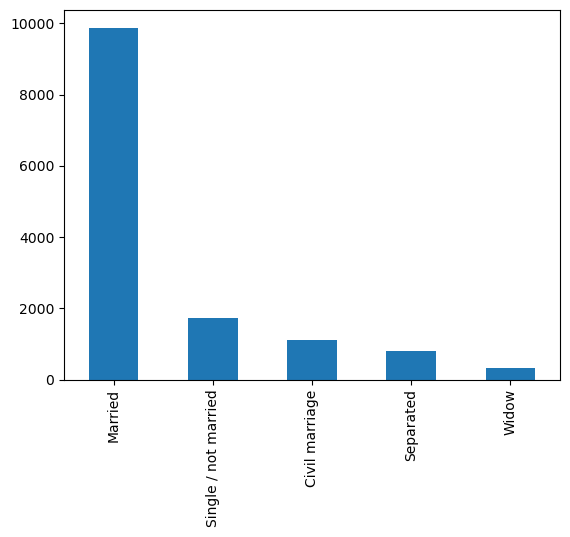

In [33]:
var = 'estado_civil'
grafico_barras = df[var].value_counts().plot.bar()

In [34]:
cont_n = df['estado_civil'].value_counts().copy()
n = len(df['estado_civil'])
cont_1_Mau=0
cont_2_Mau=0
cont_3_Mau=0
cont_4_Mau=0
cont_5_Mau=0
for i in range(0,13857):
    if df['estado_civil'][i]=='Married' and df['mau'][i] == True:
        cont_1_Mau = cont_1_Mau + 1
    elif df['estado_civil'][i]=='Single / not married' and df['mau'][i] == True:
        cont_2_Mau = cont_2_Mau + 1
    elif df['estado_civil'][i]=='Civil marriage' and df['mau'][i] == True:
        cont_3_Mau = cont_3_Mau + 1
    elif df['estado_civil'][i]=='Separated' and df['mau'][i] == True:
        cont_4_Mau = cont_4_Mau + 1
    elif df['estado_civil'][i]=='Widow' and df['mau'][i] == True:
        cont_5_Mau = cont_5_Mau + 1
tab = [["EC_1", cont_n[0], round((cont_n[0]/n)*100,2),cont_1_Mau,round((cont_1_Mau/cont_n[0])*100,2)],
       ["EC_2", cont_n[1], round((cont_n[1]/n)*100,2),cont_2_Mau,round((cont_2_Mau/cont_n[1])*100,2)],
       ["EC_3", cont_n[2], round((cont_n[2]/n)*100,2),cont_3_Mau,round((cont_3_Mau/cont_n[2])*100,2)],
       ["EC_4", cont_n[3], round((cont_n[3]/n)*100,2),cont_4_Mau,round((cont_4_Mau/cont_n[3])*100,2)],
       ["EC_5", cont_n[4], round((cont_n[4]/n)*100,2),cont_5_Mau,round((cont_5_Mau/cont_n[4])*100,2)]
      ]
tab8 = pd.DataFrame(tab, columns = ["Classe", "n", "%", "y_mau", "Y_VR%"])
print(tab8)

  Classe     n      %  y_mau  Y_VR%
0   EC_1  9880  71.30    206   2.09
1   EC_2  1729  12.48     57   3.30
2   EC_3  1116   8.05     31   2.78
3   EC_4   806   5.82     13   1.61
4   EC_5   326   2.35     12   3.68


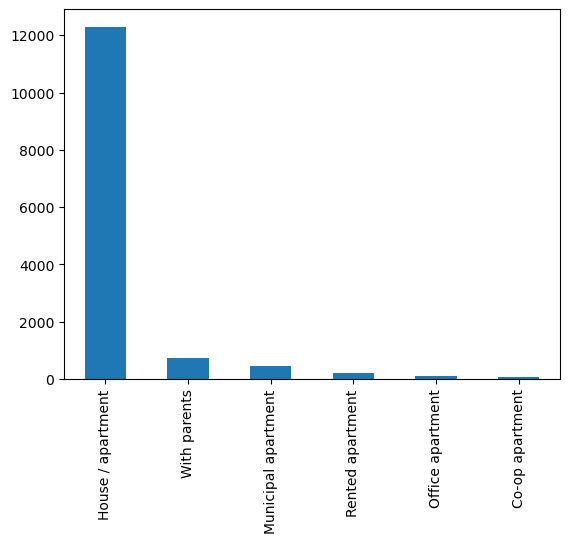

In [35]:
var = 'tipo_residencia'
grafico_barras = df[var].value_counts().plot.bar()

In [36]:
cont_n = df['tipo_residencia'].value_counts().copy()
n = len(df['tipo_residencia'])
cont_1_Mau=0
cont_2_Mau=0
cont_3_Mau=0
cont_4_Mau=0
cont_5_Mau=0
cont_6_Mau=0
for i in range(0,13857):
    if df['tipo_residencia'][i]=='House / apartment' and df['mau'][i] == True:
        cont_1_Mau = cont_1_Mau + 1
    elif df['tipo_residencia'][i]=='With parents' and df['mau'][i] == True:
        cont_2_Mau = cont_2_Mau + 1
    elif df['tipo_residencia'][i]=='Municipal apartment' and df['mau'][i] == True:
        cont_3_Mau = cont_3_Mau + 1
    elif df['tipo_residencia'][i]=='Rented apartment' and df['mau'][i] == True:
        cont_4_Mau = cont_4_Mau + 1
    elif df['tipo_residencia'][i]=='Office apartment' and df['mau'][i] == True:
        cont_5_Mau = cont_5_Mau + 1
    elif df['tipo_residencia'][i]=='Co-op apartment' and df['mau'][i] == True:
        cont_6_Mau = cont_6_Mau + 1
tab = [["EC_1", cont_n[0], round((cont_n[0]/n)*100,2),cont_1_Mau,round((cont_1_Mau/cont_n[0])*100,2)],
       ["EC_2", cont_n[1], round((cont_n[1]/n)*100,2),cont_2_Mau,round((cont_2_Mau/cont_n[1])*100,2)],
       ["EC_3", cont_n[2], round((cont_n[2]/n)*100,2),cont_3_Mau,round((cont_3_Mau/cont_n[2])*100,2)],
       ["EC_4", cont_n[3], round((cont_n[3]/n)*100,2),cont_4_Mau,round((cont_4_Mau/cont_n[3])*100,2)],
       ["EC_5", cont_n[4], round((cont_n[4]/n)*100,2),cont_5_Mau,round((cont_5_Mau/cont_n[4])*100,2)],
       ["EC_6", cont_n[5], round((cont_n[5]/n)*100,2),cont_6_Mau,round((cont_6_Mau/cont_n[5])*100,2)]
      ]
tab9 = pd.DataFrame(tab, columns = ["Classe", "n", "%", "y_mau", "Y_VR%"])
print(tab9)

  Classe      n      %  y_mau  Y_VR%
0   EC_1  12292  88.71    279   2.27
1   EC_2    736   5.31     15   2.04
2   EC_3    440   3.18     12   2.73
3   EC_4    213   1.54      6   2.82
4   EC_5    105   0.76      5   4.76
5   EC_6     71   0.51      2   2.82


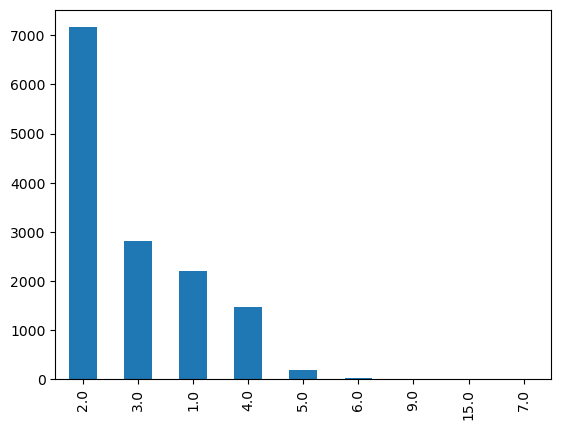

In [37]:
var = 'qt_pessoas_residencia'
grafico_barras = df[var].value_counts().plot.bar()

In [38]:
cont_n = df['qt_pessoas_residencia'].value_counts().copy()
n=len(df['qt_pessoas_residencia'])
cont_1_Mau=0
cont_2_Mau=0
cont_3_Mau=0
cont_4_Mau=0
cont_5_Mau=0
cont_6_Mau=0
for i in range(0,13857):
    if df['qt_pessoas_residencia'][i]==2.0 and df['mau'][i] == True:
        cont_1_Mau += 1
    elif df['qt_pessoas_residencia'][i]==3.0 and df['mau'][i] == True:
        cont_2_Mau += 1
    elif df['qt_pessoas_residencia'][i]==1.0 and df['mau'][i] == True:
        cont_3_Mau += 1
    elif df['qt_pessoas_residencia'][i]==4.0 and df['mau'][i] == True:
        cont_4_Mau += 1
    elif df['qt_pessoas_residencia'][i]==5.0 and df['mau'][i] == True:
        cont_5_Mau += 1
    elif df['qt_pessoas_residencia'][i]==6.0 and df['mau'][i] == True:
        cont_6_Mau += 1
    elif df['qt_pessoas_residencia'][i]==9.0 and df['mau'][i] == True:
        cont_6_Mau += 1
    elif df['qt_pessoas_residencia'][i]==15.0 and df['mau'][i] == True:
        cont_6_Mau += 1
    elif df['qt_pessoas_residencia'][i]==7.0 and df['mau'][i] == True:
        cont_6_Mau += 1
cont_n6 = cont_n[6.0:].sum()
tab = [["EC_2", cont_n[2.0], round((cont_n[2.0]/n)*100,2),cont_1_Mau,round((cont_1_Mau/cont_n[2.0])*100,2)],
       ["EC_3", cont_n[3.0], round((cont_n[3.0]/n)*100,2),cont_2_Mau,round((cont_2_Mau/cont_n[3.0])*100,2)],
       ["EC_1", cont_n[1.0], round((cont_n[1.0]/n)*100,2),cont_3_Mau,round((cont_3_Mau/cont_n[1.0])*100,2)],
       ["EC_4", cont_n[4.0], round((cont_n[4.0]/n)*100,2),cont_4_Mau,round((cont_4_Mau/cont_n[4.0])*100,2)],
       ["EC_5", cont_n[5.0], round((cont_n[5.0]/n)*100,2),cont_5_Mau,round((cont_5_Mau/cont_n[5.0])*100,2)],
       ["EC_6", cont_n6, round((cont_n6/n)*100,2),cont_6_Mau,round((cont_6_Mau/cont_n6)*100,2)]
      ]
tab10 = pd.DataFrame(tab, columns = ["Classe", "n", "%", "y_mau", "Y_VR%"])
print(tab10)

  Classe     n      %  y_mau  Y_VR%
0   EC_2  7164  51.70    158   2.21
1   EC_3  2812  20.29     57   2.03
2   EC_1  2202  15.89     61   2.77
3   EC_4  1469  10.60     35   2.38
4   EC_5   180   1.30      7   3.89
5   EC_6    30   0.22      1   3.33


<Figure size 640x480 with 0 Axes>

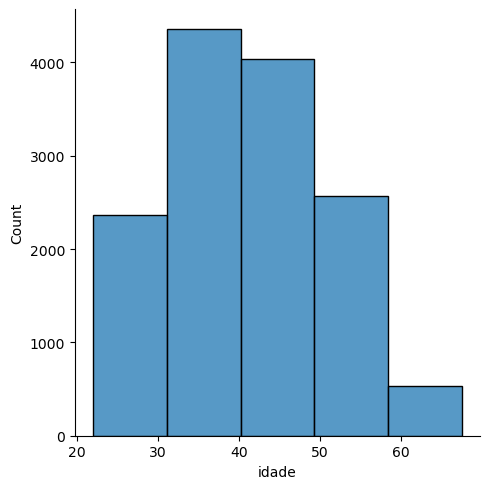

In [39]:
plt.clf()
var = "idade"
sns.displot(df, x = var, bins = 5)
plt.show()

In [40]:
cont_1=0
cont_2=0
cont_3=0
cont_4=0
cont_5=0
cont_1_Mau=0
cont_2_Mau=0
cont_3_Mau=0
cont_4_Mau=0
cont_5_Mau=0
for i in range(0,13857):
    if df['idade'][i]<=30:
        cont_1 = cont_1 + 1
        if df['mau'][i] == True:
            cont_1_Mau = cont_1_Mau + 1
    elif df['idade'][i]>30 and df['idade'][i]<=40:
        cont_2 = cont_2 + 1
        if df['mau'][i] == True:
            cont_2_Mau = cont_2_Mau + 1
    elif df['idade'][i]>40 and df['idade'][i]<=50:
        cont_3 = cont_3 + 1
        if df['mau'][i] == True:
            cont_3_Mau = cont_3_Mau + 1
    elif df['idade'][i]>50 and df['idade'][i]<=60:
        cont_4 = cont_4 + 1
        if df['mau'][i] == True:
            cont_4_Mau = cont_4_Mau + 1
    elif df['idade'][i]>60:
        cont_5 = cont_5 + 1
        if df['mau'][i] == True:
            cont_5_Mau = cont_5_Mau + 1
            
tab = [["Id_20-30", cont_1, round((cont_1/16650)*100,2),cont_1_Mau,round((cont_1_Mau/319)*100,2),round((cont_1_Mau/cont_1)*100,2)],
       ["Id_31-40", cont_2, round((cont_2/16650)*100,2),cont_2_Mau,round((cont_2_Mau/319)*100,2),round((cont_2_Mau/cont_2)*100,2)],
       ["Id_41-50", cont_3, round((cont_3/16650)*100,2),cont_3_Mau,round((cont_3_Mau/319)*100,2),round((cont_3_Mau/cont_3)*100,2)],
       ["Id_51-60", cont_4, round((cont_4/16650)*100,2),cont_4_Mau,round((cont_4_Mau/319)*100,2),round((cont_4_Mau/cont_4)*100,2)],
       ["Id_60-70", cont_5, round((cont_5/16650)*100,2),cont_5_Mau,round((cont_5_Mau/319)*100,2),round((cont_5_Mau/cont_5)*100,2)]
      ]
tab11 = pd.DataFrame(tab, columns = ["Classe", "n", "n%", "y_mau","Y1_VR%", "Y2_VR%"])
print(tab11)
print(tab11['y_mau'].sum())



     Classe     n     n%  y_mau  Y1_VR%  Y2_VR%
0  Id_20-30  1855  11.14     57   17.87    3.07
1  Id_31-40  4760  28.59    111   34.80    2.33
2  Id_41-50  4389  26.36     90   28.21    2.05
3  Id_51-60  2511  15.08     57   17.87    2.27
4  Id_60-70   342   2.05      4    1.25    1.17
319


In [41]:
cont_1=0
cont_2=0
cont_3=0
cont_4=0
cont_1_Mau=0
cont_2_Mau=0
cont_3_Mau=0
cont_4_Mau=0
for i in range(0,13857):
    if df['tempo_emprego'][i]<=10:
        cont_1 = cont_1 + 1
        if df['mau'][i] == True:
            cont_1_Mau = cont_1_Mau + 1
    elif df['tempo_emprego'][i]>10 and df['tempo_emprego'][i]<=20:
        cont_2 = cont_2 + 1
        if df['mau'][i] == True:
            cont_2_Mau = cont_2_Mau + 1
    elif df['tempo_emprego'][i]>20 and df['tempo_emprego'][i]<=30:
        cont_3 = cont_3 + 1
        if df['mau'][i] == True:
            cont_3_Mau = cont_3_Mau + 1
    elif df['tempo_emprego'][i]>30:
        cont_4 = cont_4 + 1
        if df['mau'][i] == True:
            cont_4_Mau = cont_4_Mau + 1
tab = [["TE_E<=10", cont_1, round((cont_1/16650)*100,2),cont_1_Mau,round((cont_1_Mau/319)*100,2),round((cont_1_Mau/cont_1)*100,2)],
       ["TE_11-20", cont_2, round((cont_2/16650)*100,2),cont_2_Mau,round((cont_2_Mau/319)*100,2),round((cont_2_Mau/cont_2)*100,2)],
       ["TE_21-30", cont_3, round((cont_3/16650)*100,2),cont_3_Mau,round((cont_3_Mau/319)*100,2),round((cont_3_Mau/cont_3)*100,2)],
       ["TE_E>=31", cont_4, round((cont_4/16650)*100,2),cont_4_Mau,round((cont_4_Mau/319)*100,2),round((cont_4_Mau/cont_4)*100,2)]
      ]
tab12 = pd.DataFrame(tab, columns = ["Classe", "n", "n%", "y_mau", "Y1_VR%", "Y2_VR%"])
print(tab12)

     Classe      n     n%  y_mau  Y1_VR%  Y2_VR%
0  TE_E<=10  10256  61.60    260   81.50    2.54
1  TE_11-20   2707  16.26     49   15.36    1.81
2  TE_21-30    714   4.29      7    2.19    0.98
3  TE_E>=31    180   1.08      3    0.94    1.67


In [42]:
print(round(((260+49)/(10256+2707))*100,2))
print(round((10/(714+180))*100,2))

2.38
1.12


<Figure size 640x480 with 0 Axes>

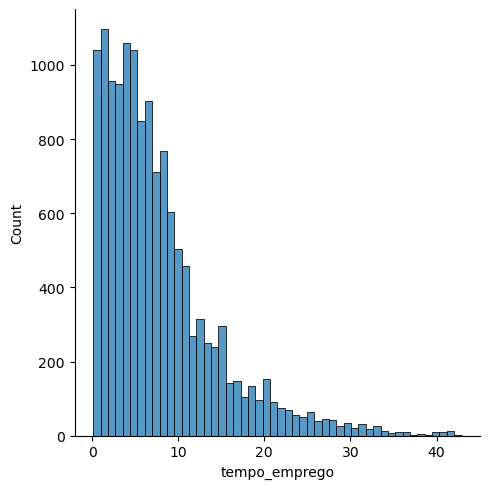

In [43]:
plt.clf()
var = "tempo_emprego"
sns.displot(df, x = var, bins = 50)
plt.show()

### Entendimento dos dados - Bivariadas

Entender a alteração da inadimplência indicada pela variável resposta (```AtrasoRelevante2anos```) e as variáveis explicativas (demais). Para isto, vamos calcular a taxa de inadimplentes (qtd inadimplentes / total) para diferentes grupos definidos pelas variáveis explicativas.


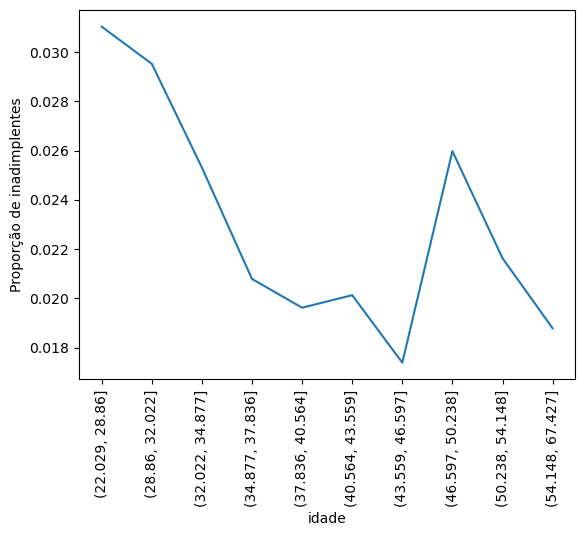

In [44]:
var = 'idade'
cat_srs, bins = pd.qcut(df[var], 10, retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()
ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

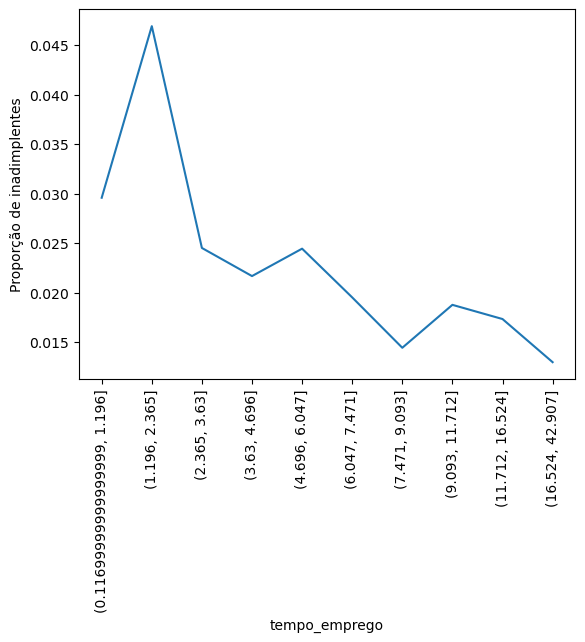

In [45]:
var = 'tempo_emprego'
cat_srs, bins = pd.qcut(df[var], 10, retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()
ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 90)

O tempo no emprego atual é inversamente proporcional a variável resposta, atraso de mais de 90 dias nas faturas de cartão de crédito. Quanto maior a estabilidade no emprego, maior a capacidade de pagamento, tendo a variável resposta maior amplitude de variação para tempos inferiores a 10 anos.

# 6. Transformação de Variáveis, Dummy(0,1), p/Modelização<a name="T_dd_M_1"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)


### AV1_M7_R2: Montagem de Tabela Metadados¶

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:
- seleção
Neste caso, os dados já estão pré-selecionados
- limpeza
Precisaremos identificar e tratar dados faltantes
- construção
Neste primeiro exercício não faremos construção de novas variáveis
- integração
Temos apenas uma fonte de dados, não é necessário agregação
- formatação
Os dados já se encontram em formatos úteis

Os dados já estão pré-selecionados, construídos e integrados, mas se há dados faltantes serão eliminados na próxima célula de código.

In [46]:
metadata = pd.DataFrame(df.dtypes, columns = ['tipo'])
metadata['n_categorias'] = 0
for var in metadata.index:
    metadata.loc[var,'n_categorias'] = len(df.groupby([var]).size())
metadata

,tipo,n_categorias
idade,float64,4396
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
tempo_emprego,float64,3004


In [47]:
def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [48]:
for var in metadata[metadata['tipo'] == 'object'].index:
    df = convert_dummy(df, var)

### Fim Tarefa 01.

-----------------------------------------------------------------------------------------------------------------

### Início Tarefa 02.

# Avaliação - Tarefa 2

#### R1: Carreguando a base já tratada anteriormente.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

# 7. População e Amostra(Treino, Teste) p/Modelização <a name="T_dd_M_2"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)    

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
Utilizaremos a técnica de floresta aleatória (**random forest**), pois é uma técnica bastante versátil e robusta que captura bem padrões complexos nos dados, relativamente fácil de se usar e que costuma produzir excelentes resultados para uma classificação como estas. Vamos ver esse algoritmo em detalhes mais adiante no curso, mas pense nele por enquanto como uma regra complexa baseada nas variáveis explicativas que classifica o indivíduo como inadimplente ou não. Mais adiante no curso vamos extrair mais dessa técnica.
- Desenho do teste
Antes de rodar o modelo precisamos construir um desenho do teste que será realizado. Para desenvolver um modelo como este, é considerado uma boa prática dividir a base em duas, uma chamada ```treinamento```, onde o algoritmo 'aprende', e outra chamada ```teste```, onde o algoritmo é avaliado. Essa prática fornece uma métrica de avaliação mais fidedigna do algoritmo, falaremos mais detalhes em lições futuras.
- Avaliação do modelo
Faremos a avaliação do nosso modelo através do percentual de acerto, avaliando a classificação do modelo (inadimplente e não inadimplente) e comparando com o estado real armazenado na variável resposta (```AtrasoRelevante2anos```). Esse percentual de acerto é frequentemente chamado de acurácia (**obs:** nunca usar assertividade... a**ss**ertivo não é aquele que a**c**erta, e sim "*adj.: em que o locutor declara algo, positivo ou negativo, do qual assume inteiramente a validade; declarativo*." a**C**ertivo está errado ;)


    . População = Dados_Treinamento
    . Amostra = Dados_Teste


#### Dividindo a base em treino e teste, ou população e amostra representativa:

     . Verificar Aleatoriedade da Escolha Treino e Teste;


#### R2: Modelização

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [65]:
# Tirando a variável resposta(VR) da base de treinamento
X = df.drop("mau",axis = 1)
# Vetorizando VR da base de treinamento
y = df["mau"]

### Estudo Populacional: Modelizando Árvore com todas as variáveis e todos os valores dados(X, y):

In [50]:
clf = DecisionTreeClassifier(random_state=100)

In [51]:
clf = clf.fit(X,y)

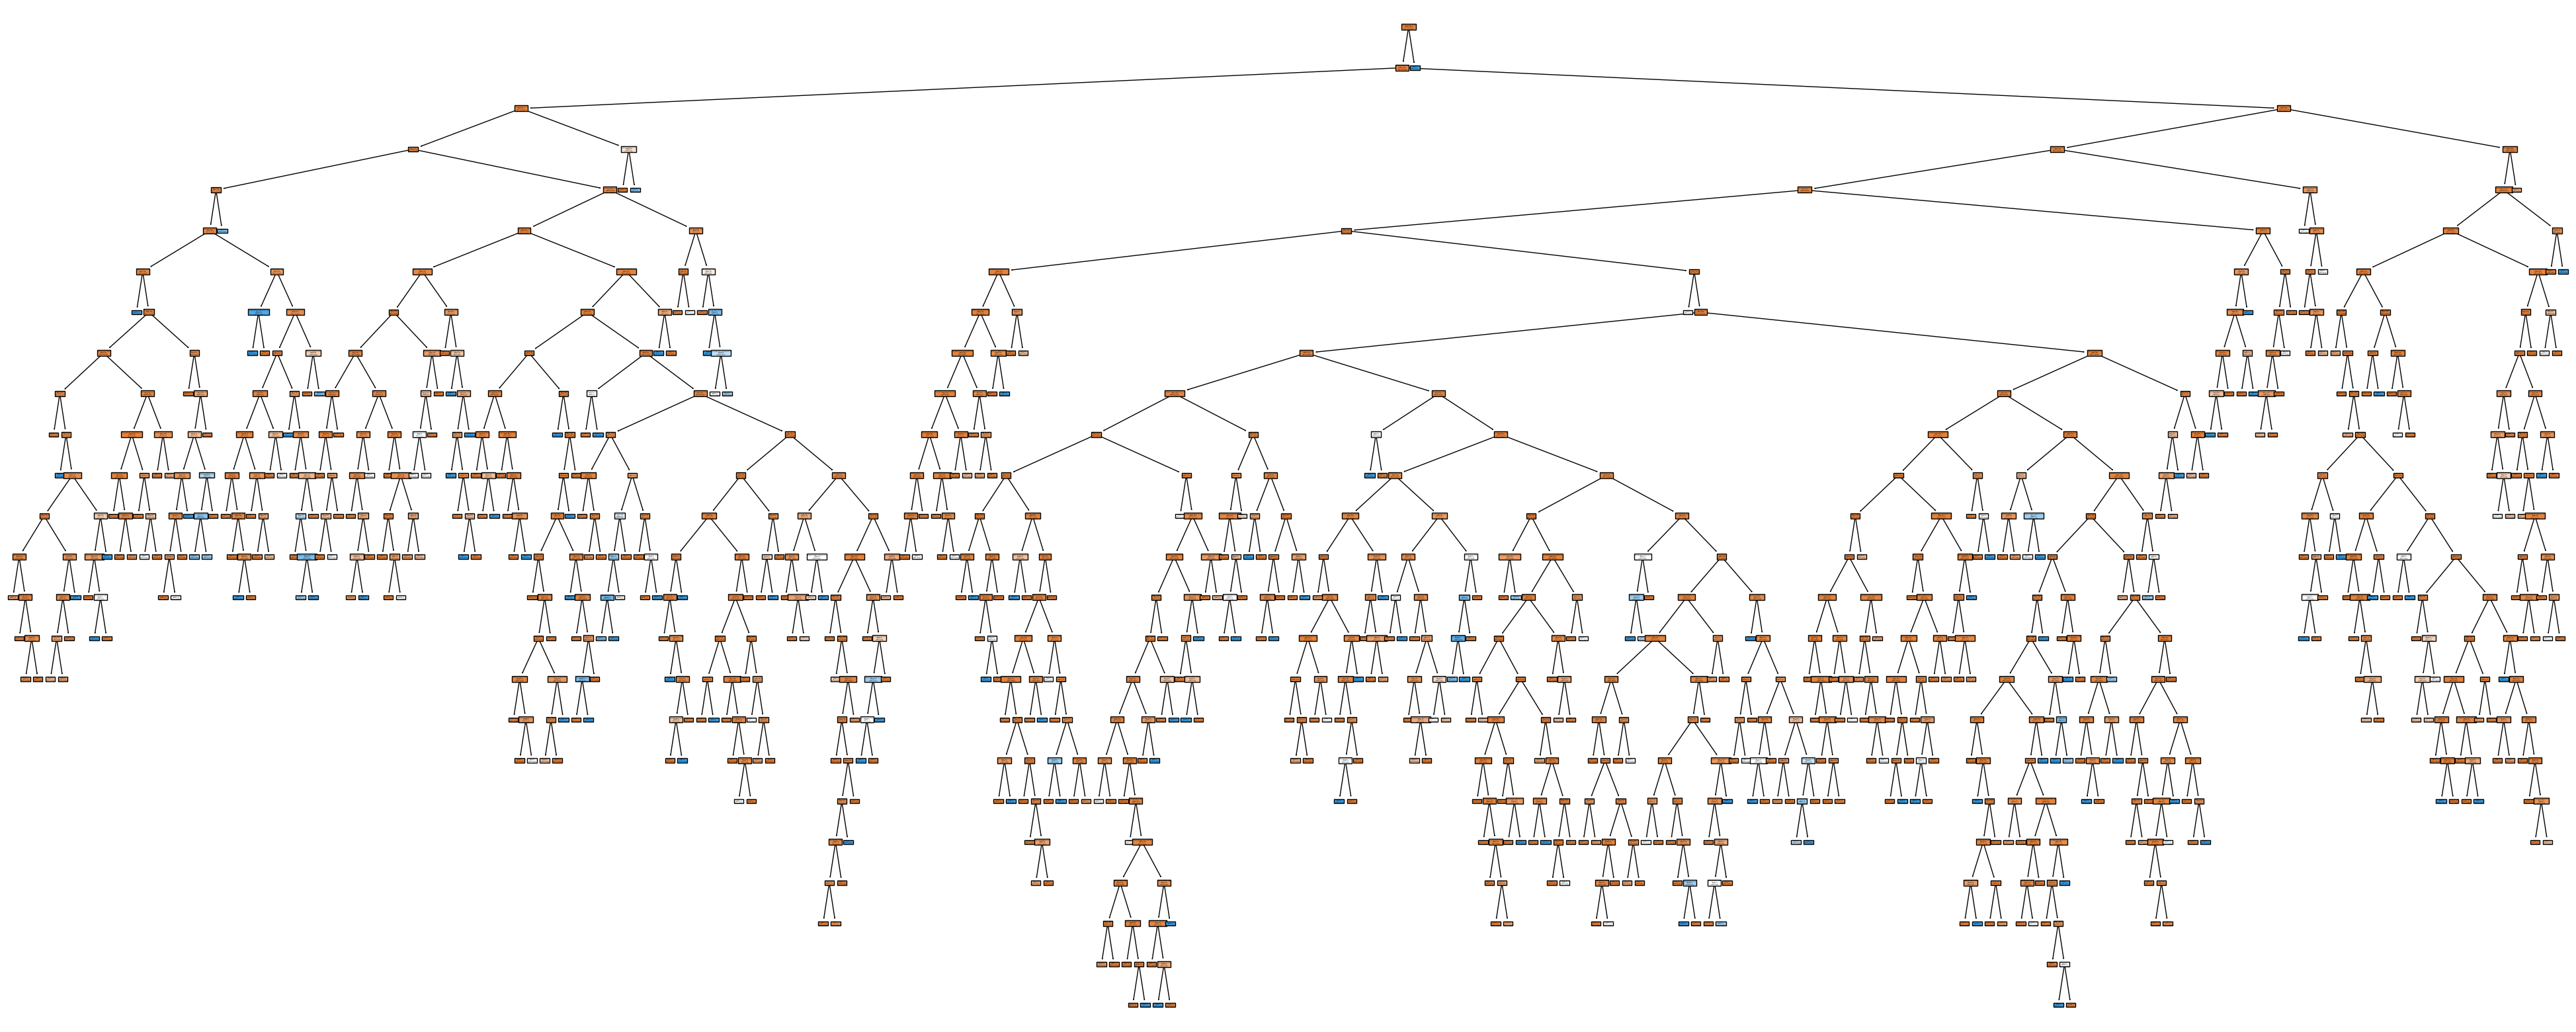

In [52]:
plt.figure(figsize=(50, 20))
arq_fig_arv_01 = plot_tree(clf,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=X.columns);


/home/eco/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


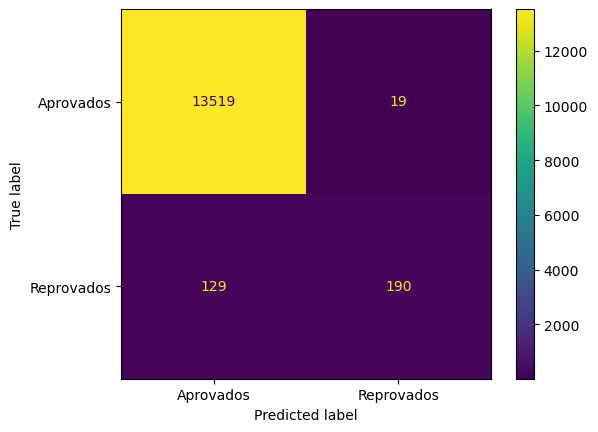

In [53]:
plot_confusion_matrix(clf, X, y, display_labels=['Aprovados', 'Reprovados'])

In [61]:
# Calculando Acurácia da Base Completa de Treinamento ou População X na Predição de Y_VR:

In [68]:
y_estimador_pop = clf.predict(X)

In [69]:
print(round(accuracy_score(y, y_estimador_pop)*100,2),'%')

98.48 %


In [63]:
# Modelizando nova Árvore de Decisão com sub-população(70%) alvo, e todas as variáveis:

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
clf = DecisionTreeClassifier(random_state=123)
clf = clf.fit(x_train,y_train)

In [ ]:
# Calculando Acurácia da Sub-População X na  Predição de Y_VR na Sub-População-Teste(Amostra):

In [70]:
y_estimador_subpop_70 = clf.predict(x_test)

In [71]:
print(round(accuracy_score(y_test, y_estimador_subpop_70)*100,2),'%')

97.02 %


In [75]:
# Matriz de Confusão para Sub-População Modelizada anteriormente:

/home/eco/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


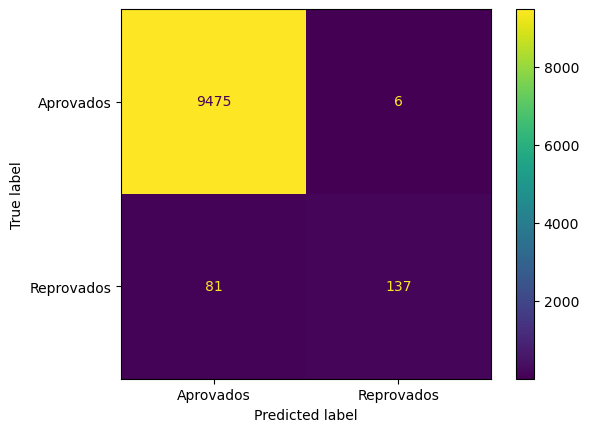

In [72]:
plot_confusion_matrix(clf, x_train,y_train, display_labels=['Aprovados', 'Reprovados'])

In [ ]:
# Matriz de Confusão para Sub-População Teste Modelizada anteriormente pela Sub-pop-Treino:

/home/eco/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


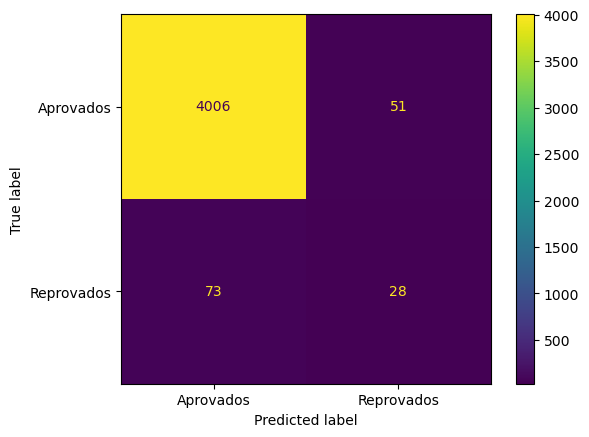

In [73]:
plot_confusion_matrix(clf, x_test, y_test, display_labels=['Aprovados', 'Reprovados'])

In [55]:
x_test.shape

(4158, 28)

In [56]:
4006+28+73+51

4158

In [80]:
round(((4006+28)/4158)*100,2)

97.02

In [81]:
print(round(accuracy_score(y_test, y_estimador_subpop_70)*100,2),'%')

97.02 %


#### R3: Avaliação do Modelo

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

# 8. Pre-Poda das Árvores de Decisão <a name="Pre-poda"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

    - Limitação dos ramos e folhas das árvores:

In [90]:
clf = DecisionTreeClassifier(max_depth=10 ,min_samples_leaf=5, random_state=123)
clf = clf.fit(x_train,y_train)
y_predict = clf.predict(x_test)
print(round((accuracy_score(y_test, y_predict)*100),2),'%')

97.64 %


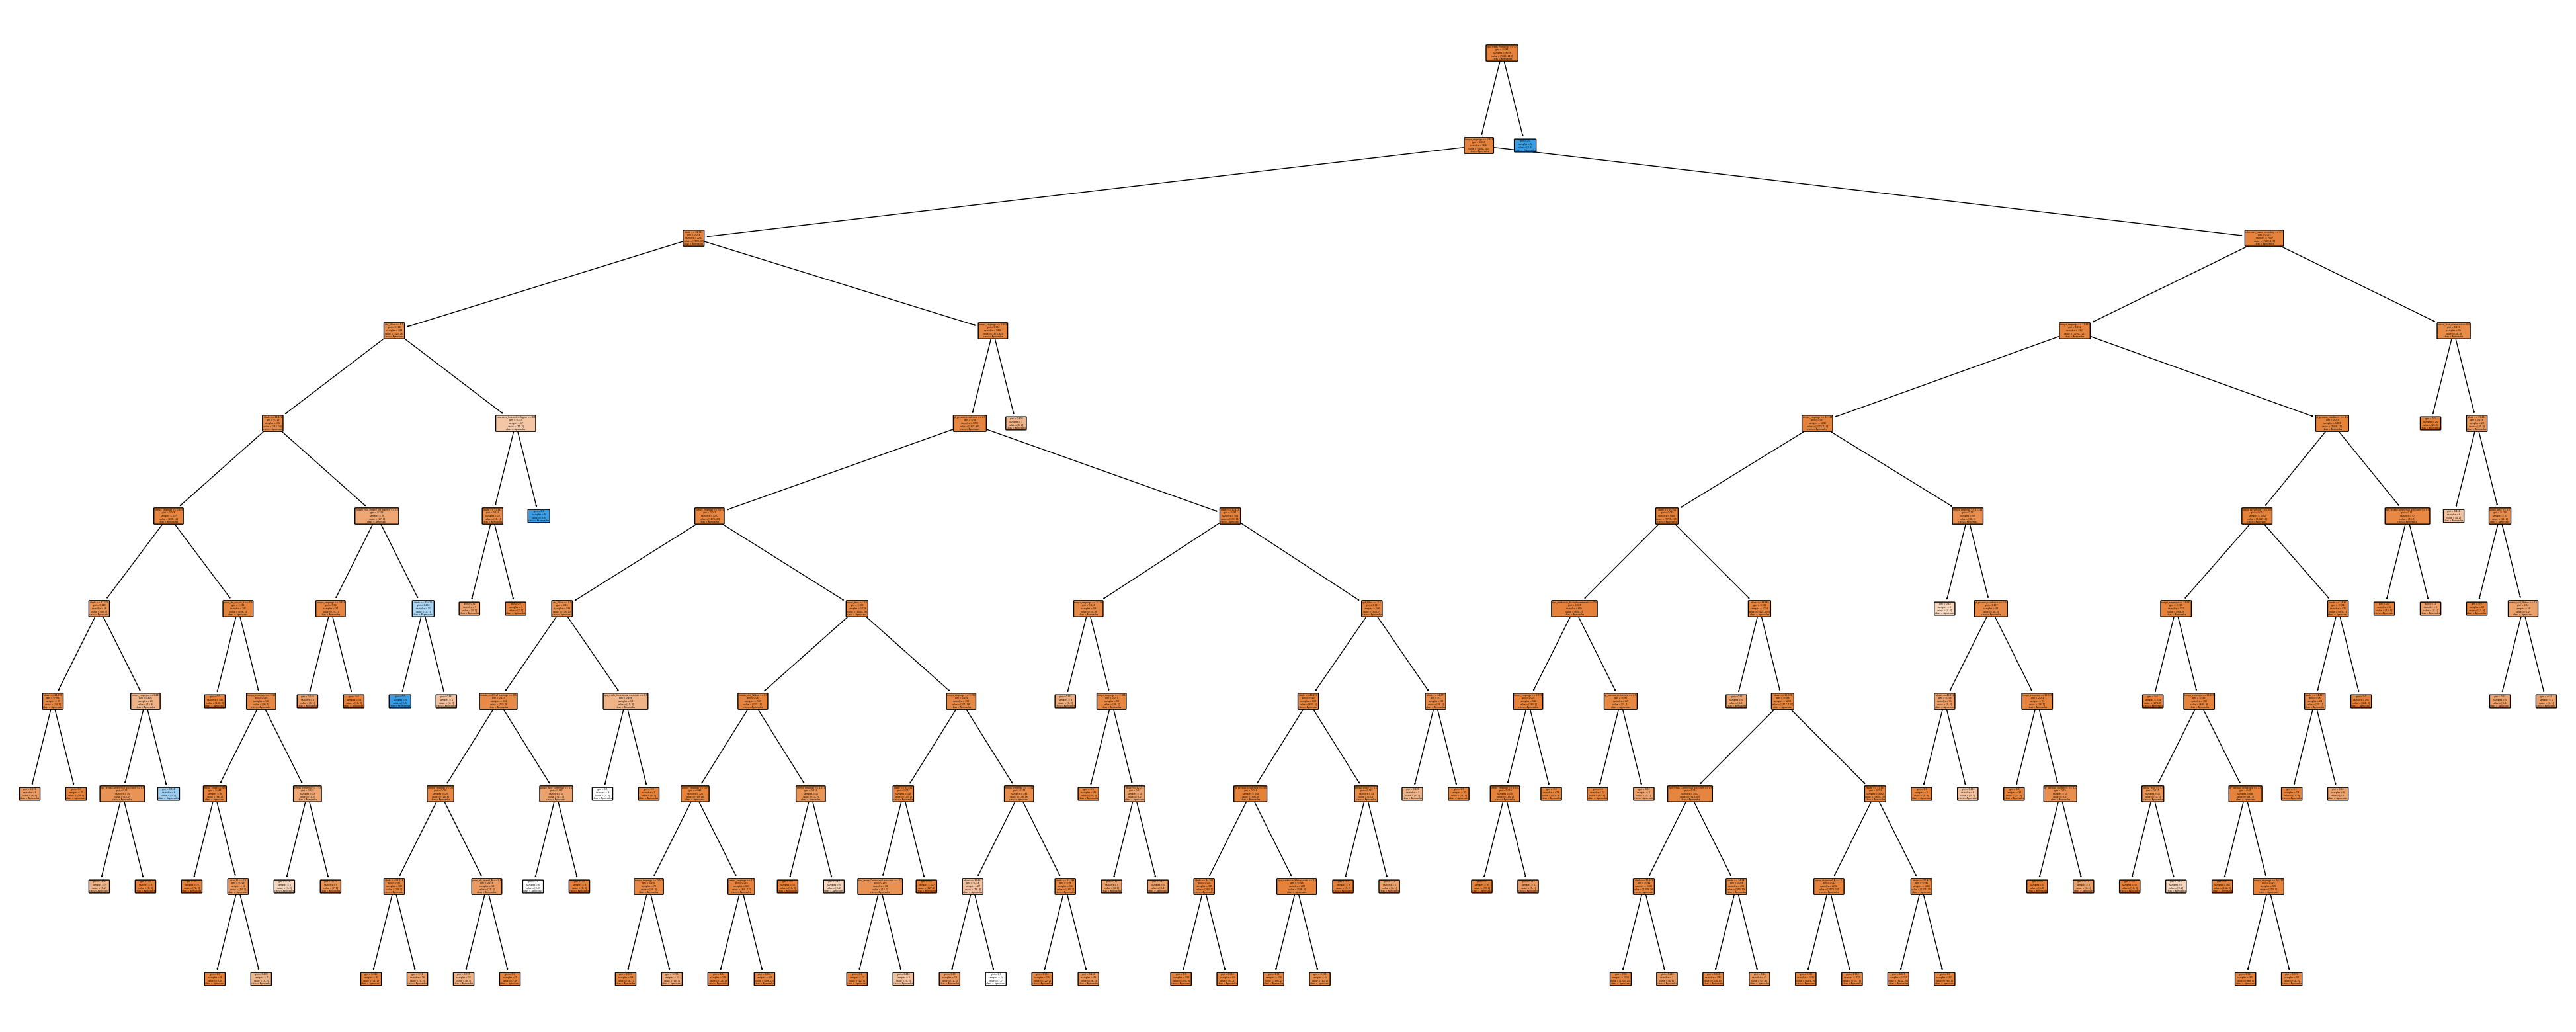

In [91]:
plt.figure(figsize=[50,20])
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['Aprovados', 'Reprovados'],
         feature_names=x_train.columns);

/home/eco/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


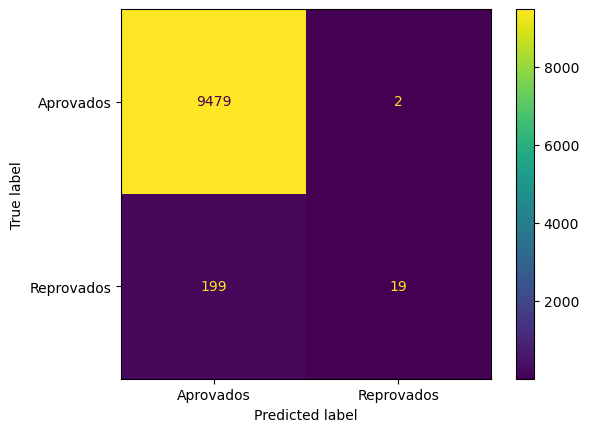

In [92]:
plot_confusion_matrix(clf, x_train,y_train, display_labels=['Aprovados', 'Reprovados'])

In [104]:
print(round(((9479+19)/(9479+19+199+2))*100,2),'%')

97.93 %


In [100]:
print(round((19/(9479+19+199+2))*100,2),'%')

0.2 %


/home/eco/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


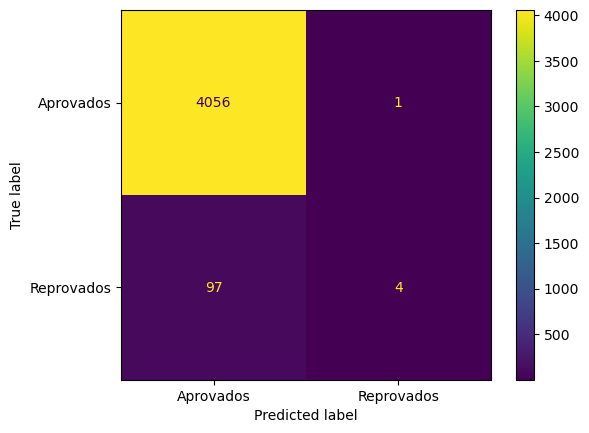

In [101]:
plot_confusion_matrix(clf, x_test,y_test, display_labels=['Aprovados', 'Reprovados'])

    - Proporção de proponentes reprovados:

In [110]:
print(round((4/(4056+4+97+1))*100,2),'%')

0.1 %


    - Se todos os contratos forem classificados como bons a acurácia teria uma variação mínima(0.1%) na modelização realizada conforme valores definidos para os parâmetros utilizados;

# 9. Conclusões <a name="Conclusões"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

    - Considerando as árvores de decisão definidas por modelização, o critério "tipo de renda" está sendo super-     valorizado como forma forma de decisão de não fornecimento de crédito, pertencimento a  classe  Pensionista, pois mesmo tendo essa  classe 100%  de  inadimplência pelo critério  adotado,  essa  classe representa apenas 0.05%(7 Indivíduos/Clientes) da população total estudada, e portando como sub-população causa-efeito causou  um prejuízo muito pequeno ou irrelevante, comparado aos demais grupos ou casos(classes) de maus pagadores   (319 Clientes);
    
    - Acreditamos que os critérios para as árvores de decisão precisam ser melhor selecionados/otimizados e este critério/decisão de "pertencer a classe Pensionista" deva ser secundário e não principal, ou ainda raiz de   decisão, pois com certeza não é amostralmente representativo dessa classe, e podemos desconsiderá-los ou tratá-los como pontos excludentes analiticamente, neste caso ou conjunto de dados;
    
    - Devemos  investigar  a  correlação  de  novos  critérios conjuntamente  a classe trabalhadores por exemplo, que possui maior número de indivíduos inadimplentes;

# 10. Referências Bibliográficas <a name="Biblio_ref"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

VANDERPLAS,JAKE.2017.Python Data Science Handbook: Essential Tools for Working with Data. Published by O’Reilly 
Media, Inc., 1005 Gravenstein Highway North, Sebastopol, CA 95472.

BEAZLEY,D. e JONES,B.2013.Python Cookbook, 3ª Edição. Published by O’Reilly Media, Inc., 1005 Gravenstein Highway North, Sebastopol, CA 95472.

HUNTER,J.2023.Matplotlib.Release_3.6.3.https://matplotlib.org/stable/Matplotlib.pdf

ROUGIER,N.P.2021.Scientific Visualization: Python + Matplotlib.https://github.com/rougier/scientific-visualization-book

2017.scikit-learn user guide, Release 0.18.2, scikit-learn developers
